# Zones of study

Topography: http://www.temis.nl/data/gmted2010/

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]


## Get HMA zone

In [2]:
latlim, lonlim = u.get_domain_HMA()

## Load topography

In [3]:
ds = xr.open_dataset('GMTED2010_15n240_1000deg.nc').drop_dims('nbounds').swap_dims(
    {'nlat': 'latitude', 'nlon': 'longitude'}).drop({'nlat', 'nlon'}).sel(latitude=latlim, longitude=lonlim)
ds

<xarray.Dataset>
Dimensions:           (latitude: 25, longitude: 50)
Coordinates:
  * latitude          (latitude) float32 20.5 21.5 22.5 23.5 ... 42.5 43.5 44.5
  * longitude         (longitude) float32 60.5 61.5 62.5 ... 107.5 108.5 109.5
Data variables:
    elevation         (latitude, longitude) int16 ...
    elevation_stddev  (latitude, longitude) int16 ...
    elevation_max     (latitude, longitude) int16 ...
    elevation_min     (latitude, longitude) int16 ...
Attributes:
    Title:                      GMTED2010 elevation data regridded at 1.000 d...
    resolution_degrees:         1.0
    resolution_summing_factor:  240
    input_file:                 S5P_OPER_REF_DEM_15_00000000T000000_99999999T...
    input_correction:           incorrect zero elevation values in the Caspia...
    institution:                KNMI / TEMIS
    url:                        http://temis.nl/data/gmted2010/
    input_note:                 see "Original_attributes" for a copy of the a...
    history:                    2016-01-11: Conversion from HDF-5 by Maarten ...
    creation_date:              2016-02-29
    gmted2010_citation:         Danielson, J.J., and Gesch, D.B., 2011, Globa...
    gmted2010_viewer_url:       http://topotools.cr.usgs.gov/gmted_viewer/
    gmted2010_citation_url:     http://pubs.usgs.gov/of/2011/1073/pdf/of2011-...

In [4]:
da = ds.elevation
da

<xarray.DataArray 'elevation' (latitude: 25, longitude: 50)>
array([[   0,    0,    0, ...,    3,    0,    4],
       [   0,    0,    0, ...,  251,   29,   26],
       [   0,    0,    0, ...,  234,  126,  141],
       ...,
       [ 118,   89,  124, ..., 1083, 1163, 1194],
       [  59,   63,   92, ..., 1031,  935, 1017],
       [  36,   56,   77, ..., 1132, 1097,  934]], dtype=int16)
Coordinates:
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 41.5 42.5 43.5 44.5
  * longitude  (longitude) float32 60.5 61.5 62.5 63.5 ... 107.5 108.5 109.5
Attributes:
    standard_name:        altitude
    long_name:            altitude above the geoid
    units:                m
    geoid:                WGS84
    ancillary_variables:  elevation_stddev
    minimum_value:        -44
    maximum_value:        5409
    gridcell_centres:     longitude latitude
    gridcell_bounds:      longitude_bounds latitude_bounds

In [5]:
std = ds.elevation_stddev
std

<xarray.DataArray 'elevation_stddev' (latitude: 25, longitude: 50)>
array([[  0,   0,   0, ...,  17,   0,  13],
       [  0,   0,   0, ..., 246,  95,  41],
       [  0,   0,   0, ..., 121,  75, 110],
       ...,
       [ 59,  13,  36, ..., 123,  99,  91],
       [ 14,   6,  24, ..., 123,  97, 147],
       [  8,   8,   7, ...,  78, 129, 127]], dtype=int16)
Coordinates:
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 41.5 42.5 43.5 44.5
  * longitude  (longitude) float32 60.5 61.5 62.5 63.5 ... 107.5 108.5 109.5
Attributes:
    standard_name:     altitude error
    long_name:         standard deviation of the altitude above the geoid
    units:             m
    geoid:             WGS84
    minimum_value:     0
    maximum_value:     1829
    gridcell_centres:  longitude latitude
    gridcell_bounds:   longitude_bounds latitude_bounds

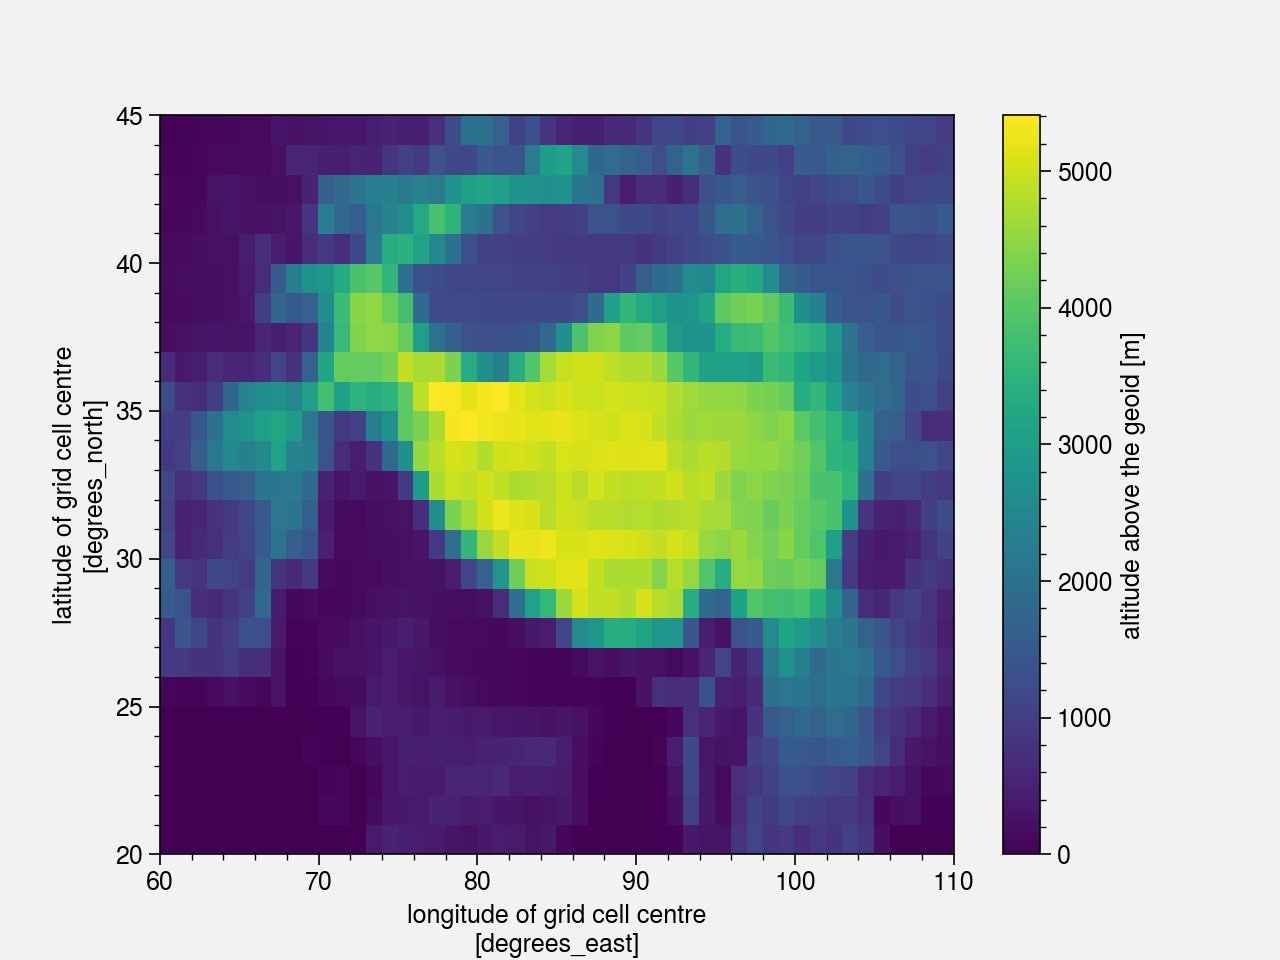

In [6]:
da.plot()

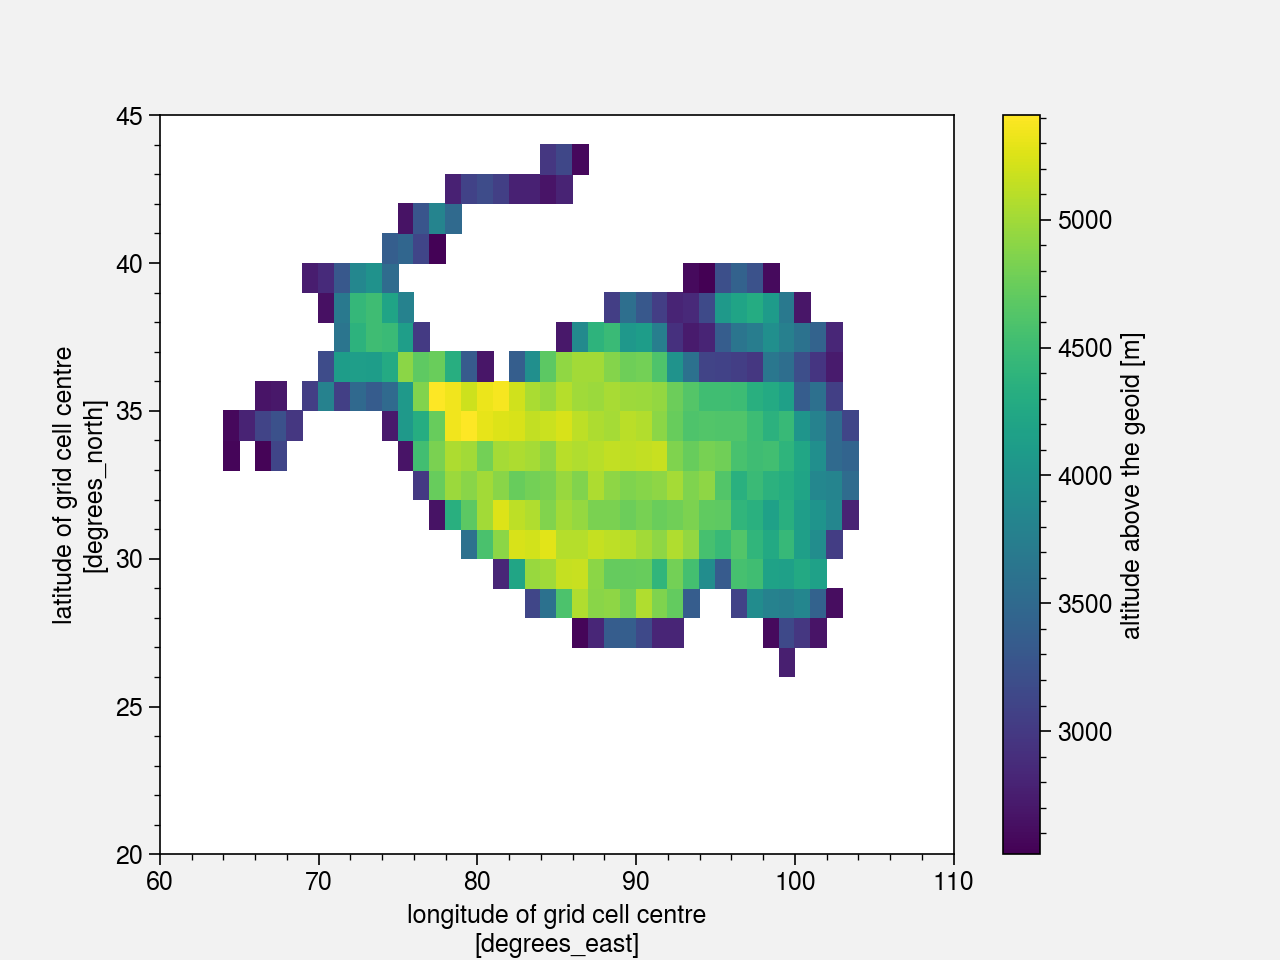

In [7]:
da.where(da > 2500).plot()

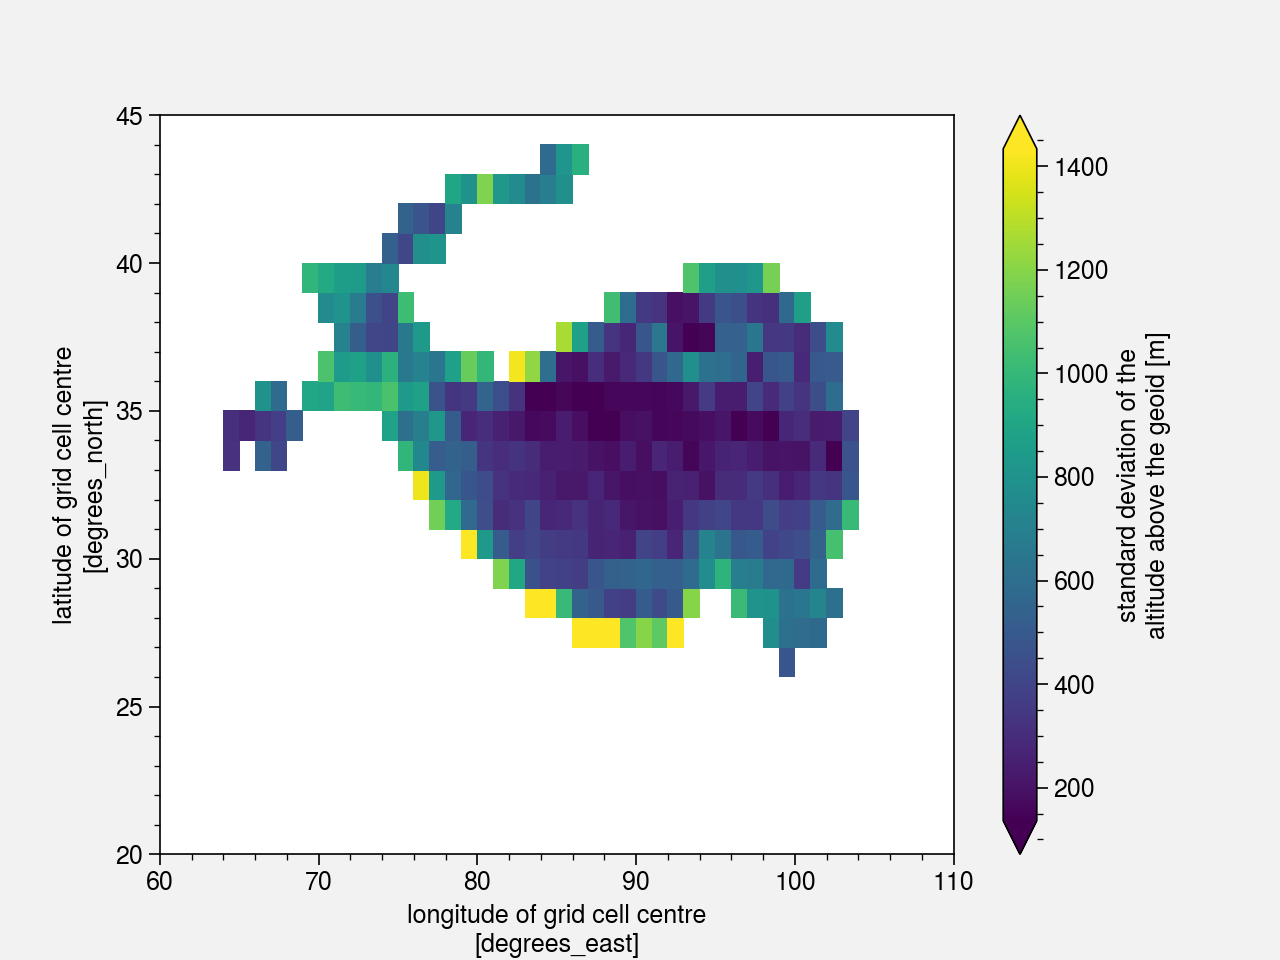

In [8]:
std.where(da > 2500).plot(robust=True)

## Show zones

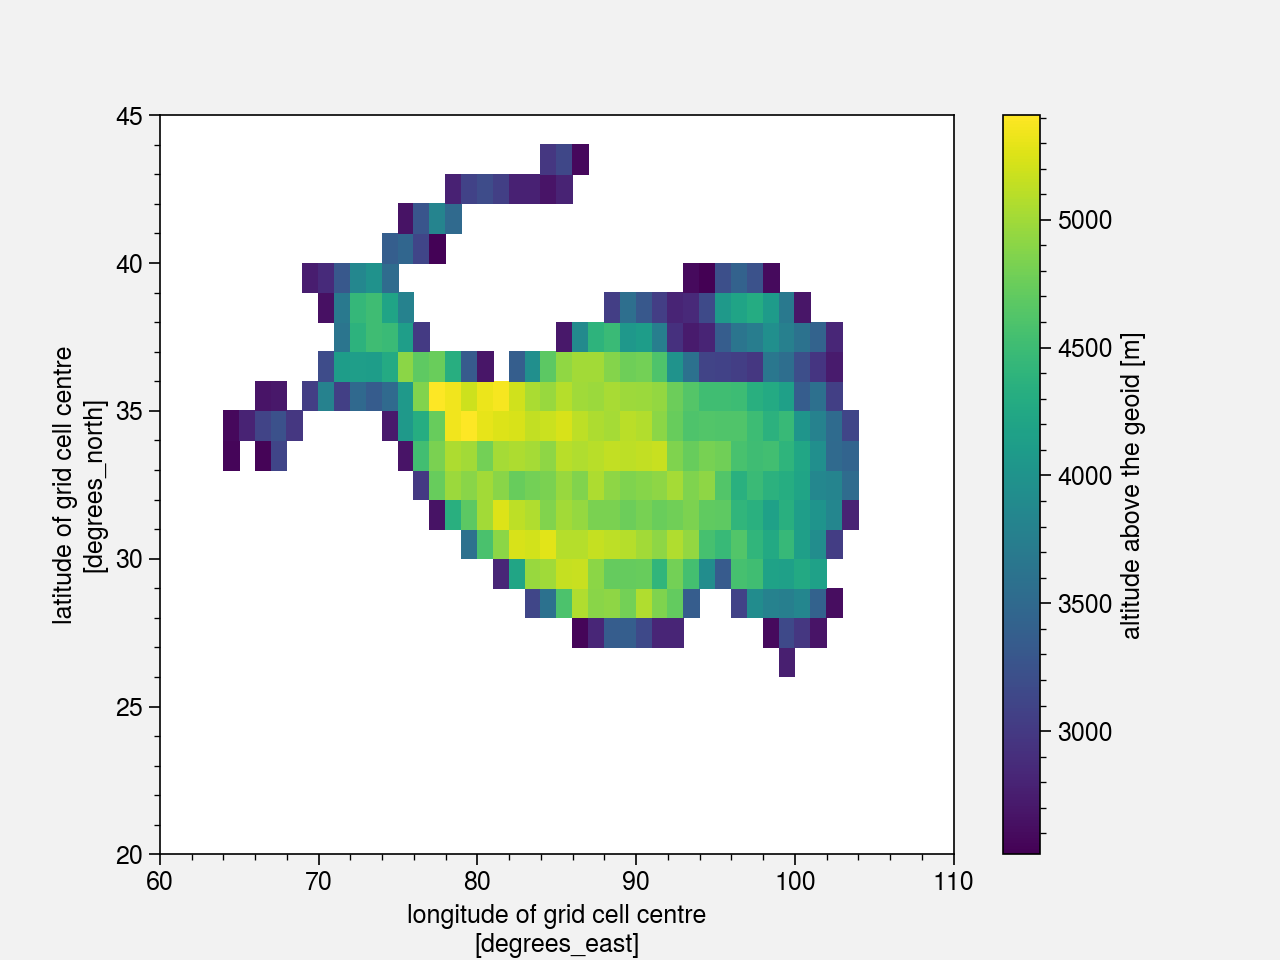

In [30]:
(da.where(da > 2500)).plot()

In [34]:
plot.arange(2500,2600,500)

array([2500])

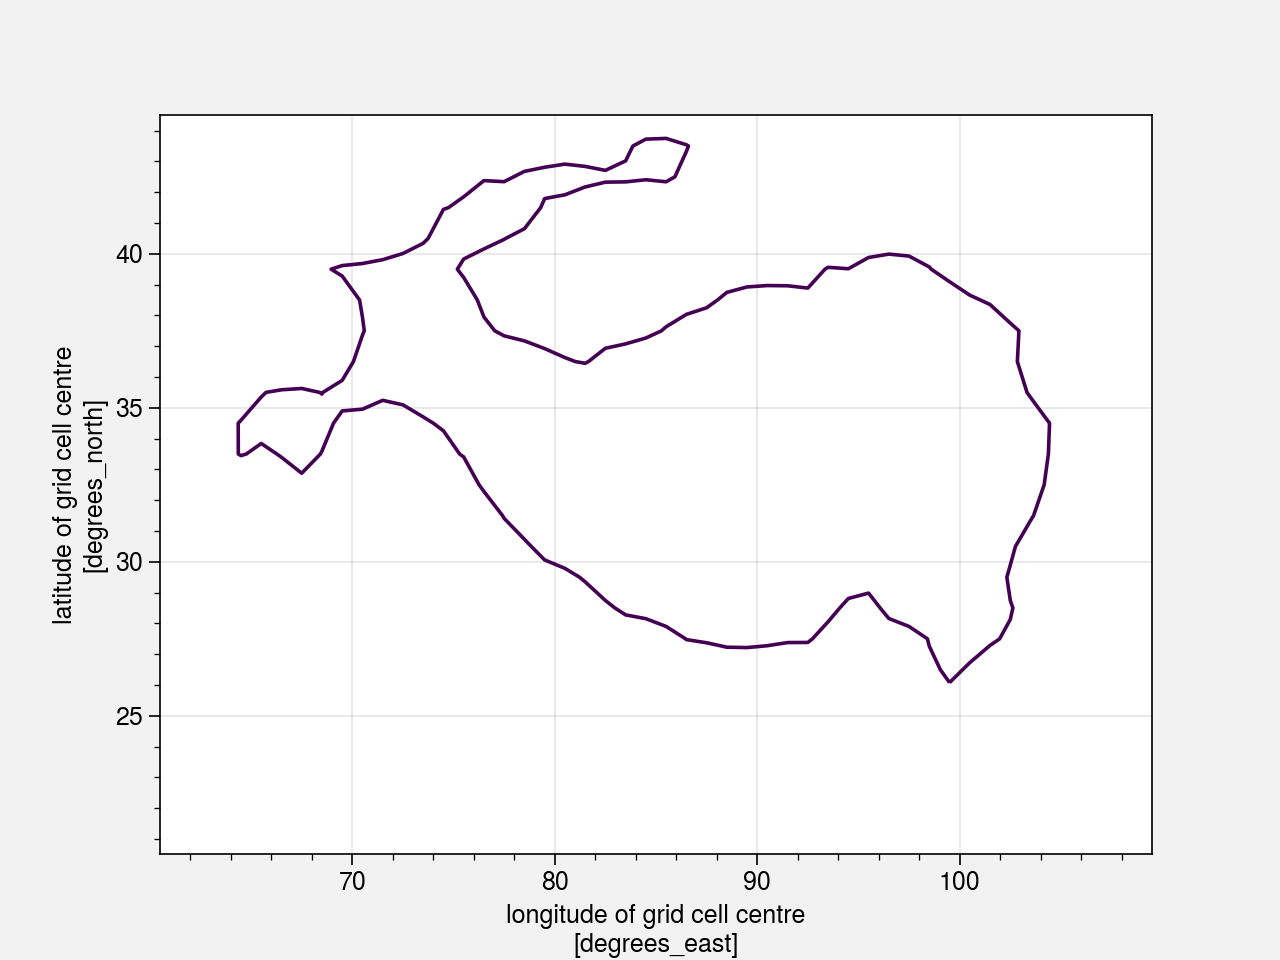

In [35]:
da.plot.contour(levels=[2500])

In [47]:
std

<xarray.DataArray 'elevation_stddev' (latitude: 25, longitude: 50)>
array([[  0,   0,   0, ...,  17,   0,  13],
       [  0,   0,   0, ..., 246,  95,  41],
       [  0,   0,   0, ..., 121,  75, 110],
       ...,
       [ 59,  13,  36, ..., 123,  99,  91],
       [ 14,   6,  24, ..., 123,  97, 147],
       [  8,   8,   7, ...,  78, 129, 127]], dtype=int16)
Coordinates:
  * latitude   (latitude) float32 20.5 21.5 22.5 23.5 ... 41.5 42.5 43.5 44.5
  * longitude  (longitude) float32 60.5 61.5 62.5 63.5 ... 107.5 108.5 109.5
Attributes:
    standard_name:     altitude error
    long_name:         standard deviation of the altitude above the geoid
    units:             m
    geoid:             WGS84
    minimum_value:     0
    maximum_value:     1829
    gridcell_centres:  longitude latitude
    gridcell_bounds:   longitude_bounds latitude_bounds

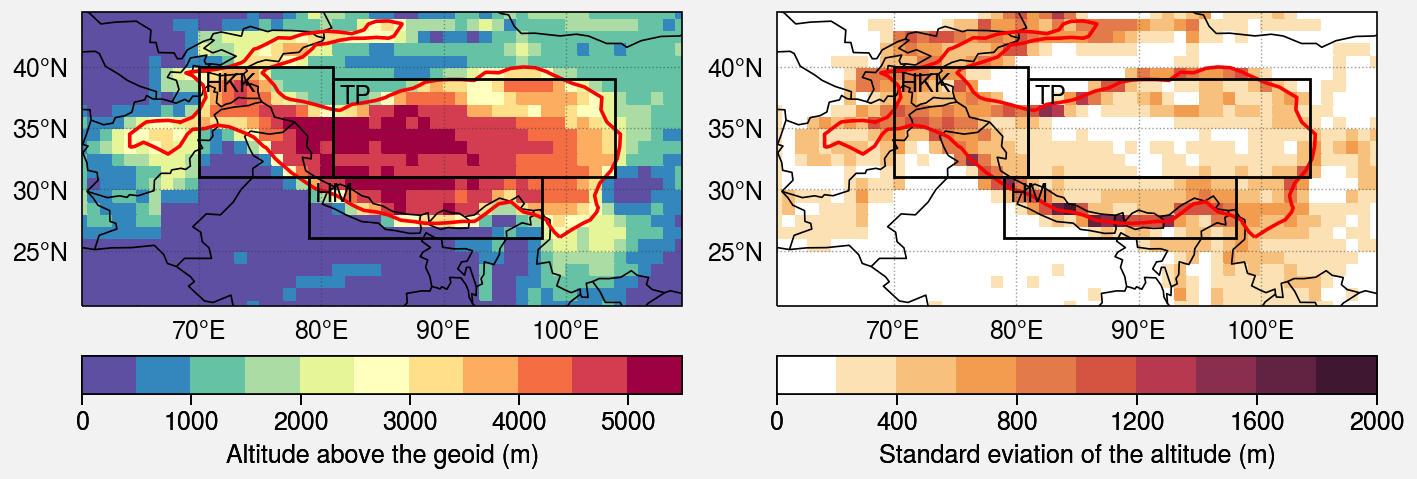

In [57]:
f, axs = plot.subplots(proj='cyl', ncols=2, nrows=1, axwidth=3)

m0 = axs[0].pcolormesh(da, cmap='Spectral')
axs[0].colorbar(m0, label='Altitude above the geoid (m)', loc='b')

m1 = axs[1].pcolormesh(std)
axs[1].colorbar(m1, label='Standard eviation of the altitude (m)', loc='b')

for ax in axs:
    u.plot_zones(ax)
    ax.contour(da, levels=[2500], color='red')
    ax.format(title='')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=5, 
    latlim=(da.latitude.min(), da.latitude.max()), 
    lonlim=(da.longitude.min(), da.longitude.max())
)

f.save('img/topo.jpg')
f.save('img/topo.png')
f.save('img/topo.pdf')